# 공부 및 실습

## 1.텍스트 데이터 숫자로 표현하기

### 단어 사전 만들기 

  1. 처리해야하는 문장을 리스트에 담고. .split() 메소드로 문장쪼개기
  
  2. 모든 문장을 단어 단위로 쪼갠후 빈 딕셔너리를 만드어서 단어들을 하나씩 채운다. bos(시작), pad(패딩), unk(unknown단어, 사전에없는) 는 딕셔너리 젤 앞에 넣고, 다른 단어들도 dict(딕셔너리)자료구조로 표현하기
  
  3. 텍스트데이터를 숫자로 바꾸기 : 딕셔너리구조가 {텍스트:인덱스} 구조여야함. 2번의 구조는 `0:<pad>` 였다면 3번에서 `<pad>:0 `으로 변경해야함<br>
     코드는 `word_to_index={word:index for index, word in index_to_word.items()}`
  
  4. 3번에서 바뀐 딕셔너리는 단어를 주면 그 단의 인덱스를 반환하는 방식으로 사용가능하다. `word_to_index['feel']` 는 4를 반환한다.
  
  5. 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들기`get_encoded_sentence` (모든 문장은 `<BOS>`로 시작)
    - encode된 벡터를 decode하여 다시 원래 텍스트 데이터로 복구할 수도 있다.( `get_decoded_sentence`)
    - 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode(`get_decoded_sentences`)
    
## 텍스트 데이터 특징 

### embedding레이어
- 위에서 진행한것은 **단순히 텍스트가 숫자로 변환**된것뿐, **텍스트에 담긴 언어의 의미와 대응**되는 벡터가 아님. 
- 우리가 해야하는 것은 그 단어의 의미를 나타내는 벡터를 짝짓는 것.
- **단어의 의미를 나타내는 벡터를 훈련가능한 파라미터로 놓고 이를 딥러닝을 통해 학습해서 최적화시킴**
- ensorflow, Pytorch 등의 딥러닝 프레임워크들은 이러한 의미벡터 파라미터를 구현한 Embedding 레이어를 제공
- **주의사항:  Embedding 레이어의 인풋이 되는 문장 벡터는 그 길이가 일정해야함** -> Tensorflow에서는 `keras.preprocessing.sequence.pad_sequences`라는 편리한 함수를 통해  **문장 벡터 뒤에 패딩을 추가하여 길이를 일정하게 맞춰주는 기능 제공**,( 3개의 단어 문장과 5개의 단어문장이 있을때 3개의 단어문장 뒤에 2개의 패딩이 추가되는것, 패드는 0에 맵핑 기억하기)
- 코드 
`raw_inputs = keras.preprocessing.sequence.pad_sequences(`
`raw_inputs, ` -> 시퀀스 목록(정수)                             `value=word_to_index['<PAD>'],`->부동 소수점 또는 문자열, 패딩 값. (선택 사항, 기본값은 0)<br>
`padding='post',` -> padding	문자열, 'pre' 또는 'post'(선택 사항, 기본값은 'pre'): 각 시퀀스 앞이나 뒤에 채웁니다. post는 뒤<br>`maxlen=5)` -> 모든 시퀀스의 최대길이, 없으면 시퀀스가 가장긴 개별시퀀스 길이로 채워짐
- shape=(3, 5, 4)에서 shape=(입력문장갯수, 입력문장최대길이, 워드벡터차원의수)
                 

### 시퀀스 데이터를 다루는 RNN(Recurrent Neural Network)
-  시퀀스(Sequence) 형태의 데이터
  - 특정 순서를 가져서 독립적이지 않음
  - 입력 x와 출력 y가 시간의 순서대로나열됨
  - 시계열데이터(시간의 흐름에 따라 기록된데이터)와 텍스트데이터(텍스트도 쪼개어보면 시간에따라 문맥이 존재함, 순서가존재)
  - 음성데이터 
    1. i feel hungry'라는 문장을 누군가가 초당 한 단어씩, 3초에 걸쳐 이 문장을 발음 
    2. `at time=0s : 듣는이의 귀에 들어온 input='i'
at time=1s : 듣는이의 귀에 들어온 input='feel'
at time=2s : 듣는이의 귀에 들어온 input='hungry'`
    3. time=1s인 시점에서 입력으로 받은 문장은 'i feel' 까지,그 뒤 단어는 무엇이 올지 알수없다.
    4. RNN은 시간의 흐름에 따라 새롭게 들어오는 입력에 따라 변하는 현재 상태를 묘사하는 state machine으로 설계되어 위와 같은 상황을 묘사하기에 적장한 모델구조를 가지고 있음
    
- `vocab_size = 10`   어휘 사전의 크기입니다(10개의 단어)
- `word_vector_dim = 4`  단어 하나를 표현하는 임베딩 벡터의 차원수
- RNN 외에도 다양한 시도 가능
  - 1-D Convolution Neural Network(1-D CNN),   
  - GlobalMaxPooling1D() 레이어 하나만 사용하는 방법 : 단 하나의 가장 중요한 단어만 피처로 추출하여 그것으로 문장의 긍정/부정을 평가하는 방식
  - 1-D CNN과 RNN 레이어를 섞어
  - FFN(FeedForward Network) 레이어만으로 구성
  - Transformer 레이어

In [ ]:
# RNN 모델

vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

In [ ]:
# 1-D CNN 모델

vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

In [ ]:
# GlobalMaxPooling1D() 모델
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

## 1. 데이터셋분석

1. 5만개의 리뷰 중 각 2만5천개씩 훈련용, 테스트용으로 사용

2. `(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)` 단어사전에 등재할 단어의 갯수를 만개로 지정하면 그 갯수만큼 word_to_index 딕셔너리까지 생성된 형태로 데이터셋이 생성됨

3. 데이터 실제 예시를 확인 -> 숫자로 encode된 텍스트 데이터를 다운로드받았음을 확인 -> encode에 사용한 딕셔너리까지 함께 제공된것 확인

4. word_to_index, index_to_word 보정 : pad, bos, unk, unused 0~3까지추가 

5. encode된 텍스트가 정상적으로 decode되는지 확인

6. 문장길이 통일하기 위해 적절한 길이값을 찾아야함 -> 데이터셋 분포확인하여  maxlen 설정

7. pad_sequences 의 패딩방식은 pre가 유리한 이유 
  - 입력데이터가 순차적으로 처리
  - 가장 마지막 입력이 최종 state 값에 가장 영향을 많이 줌
  - 마지막 입력이 무의미한 패딩으로 채워지면 비효율
  - 'pre'가 훨씬 유리하며, 10% 이상의 테스트 성능 차이가 남

## 2. 딥러닝 모델 설계와 훈련

- RNN 모델 설계 
  - 어휘 사전 크기 vocab_size 
  - 워드 벡터 차원의 수 word_vector_dim
  - 이전 작성했던 것 입력
- 검증셋(validation set 분리
  - model 훈련 전
  - 훈련용 데이터셋 25000건 중 10000건을 분리
  - 적절한 validation 데이터는 몇 개가 좋을지 고민
- 모델학습 시작 : 결과 보면서  epoch 수정

- 테스트셋으로 평가

-  history 변수에 저장되어있는 것 그래프 확인
  -  validation loss의 그래프가 train loss와의 이격이 발생시 트레이닝이 무의미해짐

## 3. Word2Vec의 적용
##

# EX7_ IMDb 영화리뷰 감성분

- 200K reviews in total
- ratings.txt: All 200K reviews
- ratings_test.txt: 50K reviews held out for testing
- ratings_train.txt: 150K reviews for training
 
### 1.링크연결
`ln -s ~/data/*.txt ~/aiffel/sentiment_classification/data`

### 2. 데이터 준비와 확인


In [56]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
### 3. 데이터로더구성

In [57]:
from konlpy.tag import Mecab
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 

    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)

    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]

    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))

    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)
index_to_word = {index:word for word, index in word_to_index.items()}

In [58]:
len(word_to_index)

10000

In [59]:
len(X_test)

49157

In [60]:
len(X_train)

146182

In [61]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

### 4. 모델구성을 위한 데이터 분식 및 가공

#### 4- 1. 데이터셋 내 문장 길이 분포 
#### 4- 2. 적절한 최대 문장 길이 지정 : maxlen은 41
#### 4- 3. keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가

In [62]:
# 4-1 데이터 셋 내 문장 길이 분포
total_data_text = list(X_train) + list(X_test)

# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print(len(total_data_text))
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092
195339
pad_sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정값 이내에 포함됩니다. 


In [63]:
# 4- 3. keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가
X_train = keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre',
                                                        maxlen=maxlen)

X_test = keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre',
                                                       maxlen=maxlen)

### 5. 모델구성 및 validation set 구성

In [64]:
#validation set  구성

# validation set 20000건 분리
X_val = X_train[:20000]   
y_val = y_train[:20000]

# validation set을 제외한 나머지 130000건
partial_X_train = X_train[20000:]  
partial_y_train = y_train[20000:]

print(partial_X_train.shape)
print(partial_y_train.shape)

(126182, 41)
(126182,)


In [65]:
# 모델구성

# 1-D CNN
vocab_size = 10000 
word_vector_dim = 50    

cnn = keras.Sequential()
cnn.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
cnn.add(keras.layers.Conv1D(16, 7, activation='relu'))
cnn.add(keras.layers.MaxPooling1D(5))
cnn.add(keras.layers.Conv1D(16, 7, activation='relu'))
cnn.add(keras.layers.GlobalMaxPooling1D())
cnn.add(keras.layers.Dense(16, activation='relu'))
cnn.add(keras.layers.Dense(1, activation='sigmoid'))  

cnn.summary()

# RNN 모델

rnn = keras.Sequential()
rnn.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
rnn.add(keras.layers.LSTM(8))   
rnn.add(keras.layers.Dense(8, activation='relu'))
rnn.add(keras.layers.Dense(1, activation='sigmoid'))  

rnn.summary()

# GlobalMaxPooling1D() 모델

gmp = keras.Sequential()
gmp.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
gmp.add(keras.layers.GlobalMaxPooling1D())
gmp.add(keras.layers.Dense(8, activation='relu'))
gmp.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

gmp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 50)          500000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 16)          5616      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

### 6. 모델 훈련 개시
- 동일하게 10epochs를 했을때 모두 3번째 에폭에서 고점이 나옴
  - cnn은  accuracy: 0.8978 - val_loss: 0.3330 - val_accuracy: 0.8598
  - rnn은 accuracy: 0.8768 - val_loss: 0.3373 - val_accuracy: 0.8554
  - gmp 는 accuracy: 0.8801 - val_loss: 0.3386 - val_accuracy: 0.8530


In [75]:
# 1-D CNN 모델학습

cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=8  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 


history_cnn = cnn.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

# RNN 모델 학습

rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=8  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history_rnn = rnn.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)


# GlobalMaxPooling1D()  모델학습

gmp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=8  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history_gmp = gmp.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/8
247/247 [==============================] - 3s 11ms/step - loss: 0.0113 - accuracy: 0.9958 - val_loss: 1.4183 - val_accuracy: 0.8191
Epoch 2/8
247/247 [==============================] - 3s 11ms/step - loss: 0.0120 - accuracy: 0.9955 - val_loss: 1.3998 - val_accuracy: 0.8199
Epoch 3/8
247/247 [==============================] - 3s 11ms/step - loss: 0.0113 - accuracy: 0.9957 - val_loss: 1.3373 - val_accuracy: 0.8196
Epoch 4/8
247/247 [==============================] - 3s 11ms/step - loss: 0.0116 - accuracy: 0.9953 - val_loss: 1.4120 - val_accuracy: 0.8152
Epoch 5/8
247/247 [==============================] - 3s 11ms/step - loss: 0.0093 - accuracy: 0.9963 - val_loss: 1.5681 - val_accuracy: 0.8180
Epoch 6/8
247/247 [==============================] - 3s 11ms/step - loss: 0.0087 - accuracy: 0.9968 - val_loss: 1.5032 - val_accuracy: 0.8184
Epoch 7/8
247/247 [==============================] - 3s 11ms/step - loss: 0.0082 - accuracy: 0.9968 - val_loss: 1.5951 - val_accuracy: 0.8133
Epoch 

In [76]:
# 테스트셋 평가
print("CNN")
results_cnn = cnn.evaluate(X_test,  y_test, verbose=2)
print(results_cnn)

print("RNN")
results_rnn = rnn.evaluate(X_test,  y_test, verbose=2)
print(results_cnn)

print("GlobalMaxPooling1D")
results_gmp = gmp.evaluate(X_test,  y_test, verbose=2)
print(results_cnn)

CNN
1537/1537 - 2s - loss: 1.4832 - accuracy: 0.8204
[1.4832351207733154, 0.8203511238098145]
RNN
1537/1537 - 5s - loss: 0.4252 - accuracy: 0.8453
[1.4832351207733154, 0.8203511238098145]
GlobalMaxPooling1D
1537/1537 - 2s - loss: 0.4720 - accuracy: 0.8362
[1.4832351207733154, 0.8203511238098145]


### 7. Loss, Accuracy 그래프 시각화

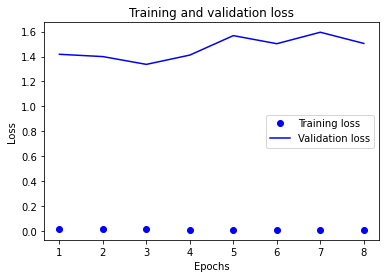

In [77]:
# CNN 시각화

import matplotlib.pyplot as plt

history_dict = history_cnn.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

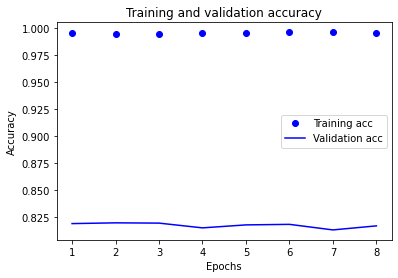

In [78]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

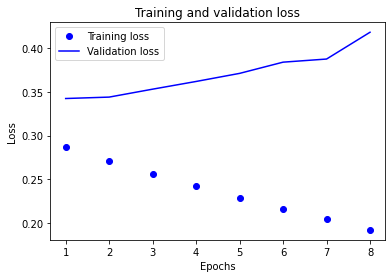

In [80]:
# RNN 시각화

history_dict = history_rnn.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

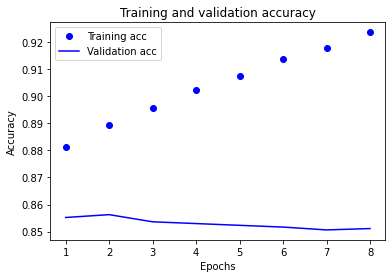

In [81]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

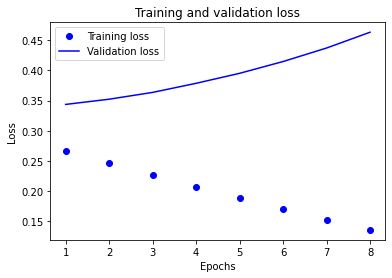

In [82]:
# GlobalMaxPooling1D 시각화

history_dict = history_gmp.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

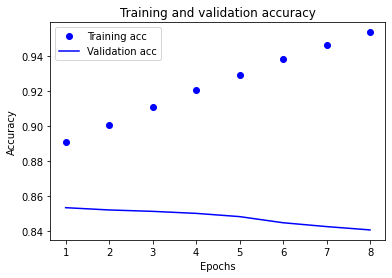

In [84]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 8. 학습된 Embedding 레이어 분석

In [85]:
embedding_layer_cnn = cnn.layers[0]
weights_cnn = embedding_layer_cnn.get_weights()[0]
print(weights_cnn.shape)    # shape: (vocab_size, embedding_dim)

(10000, 50)


In [86]:
embedding_layer_rnn = rnn.layers[0]
weights_rnn = embedding_layer_rnn.get_weights()[0]
print(weights_rnn.shape)    # shape: (vocab_size, embedding_dim)

(10000, 50)


In [87]:
embedding_layer_gmp = gmp.layers[0]
weights_gmp = embedding_layer_gmp.get_weights()[0]
print(weights_gmp.shape)    # shape: (vocab_size, embedding_dim)

(10000, 50)


In [90]:
import os

# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path_cnn = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec_cnn.txt'
f = open(word2vec_file_path_cnn, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = cnn.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path_rnn = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec_rnn.txt'
f = open(word2vec_file_path_rnn, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = rnn.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path_gmp = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec_gmp.txt'
f = open(word2vec_file_path_gmp, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = gmp.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [93]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors_cnn = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path_cnn, binary=False)
word_vectors_rnn = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path_cnn, binary=False)
word_vectors_gmp = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path_cnn, binary=False)
